In [9]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  IPython.display import display

In [2]:
df = pd.read_csv("./plot_ready_data.csv", index_col=[0]).reset_index().rename(columns={"index":"Q"})

In [16]:
df = pd.read_csv("./plot_ready_data_volatile.csv", index_col=[0]).reset_index().rename(columns={"index":"Q"})

In [15]:
q6

,Q,time,counter,threads
0,Q6,12,1000000,1
1,Q6,174,2456123,4
2,Q6,283,4015418,8
3,Q6,506,5842232,16
4,Q6,998,7686022,32
5,Q7,36,1000000,1
6,Q7,270,5000000,4
7,Q7,360,13000000,8
8,Q7,621,29000000,16
9,Q7,1352,61000000,32


In [20]:
df_list = {}
for q,d in df.groupby(by="Q"):
    d["threads"] = [1,4,8,16,32]
    df_list[q] = d
    


/Users/uriamor/anaconda/envs/uria_bio/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [18]:
cdf = pd.concat([df_list[q] for q in df_list.keys()])
cdf

,Q,time,counter,threads
5,Q7,37,1000000,1
6,Q7,261,5000000,4
7,Q7,415,13000000,8
8,Q7,539,29000000,16
9,Q7,1271,61000000,32
0,Q6,7,1000000,1
1,Q6,3,4995317,4
2,Q6,3,12539446,8
3,Q6,5,26396330,16
4,Q6,6,56147138,32


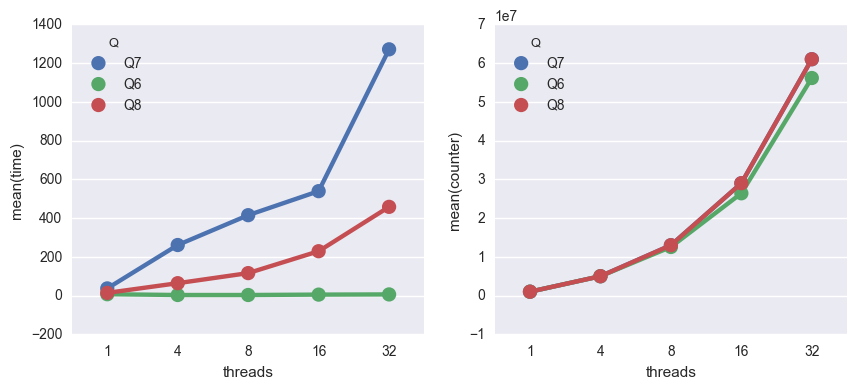

In [21]:
f, a = plt.subplots(1,2)
f.set_size_inches(10,4)
# f.set_size_inches(10,4)
# for q in df_list.keys():
#     p = sns.pointplot(x="threads", y="time", data=df_list[q],ax=a[0])
#     p = sns.pointplot(x="threads", y="counter", data=df_list[q],ax=a[1] )

sns.pointplot(x="threads", y="time", data=cdf, hue="Q",ax=a[0])
sns.pointplot(x="threads", y="counter", data=cdf, hue="Q",ax=a[1])

plt.savefig("Q8_2_second.png")

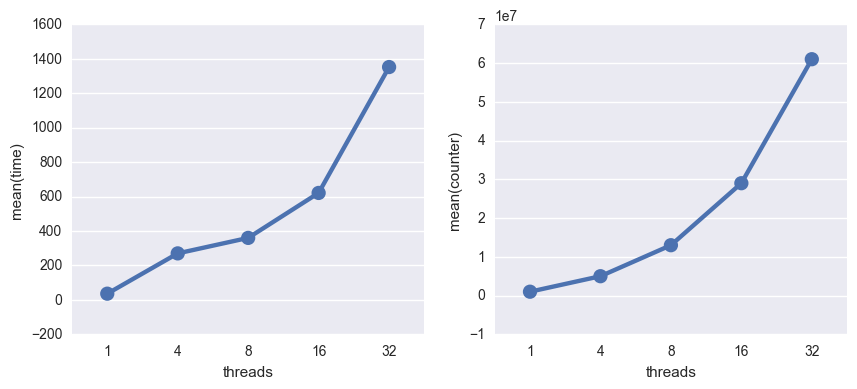

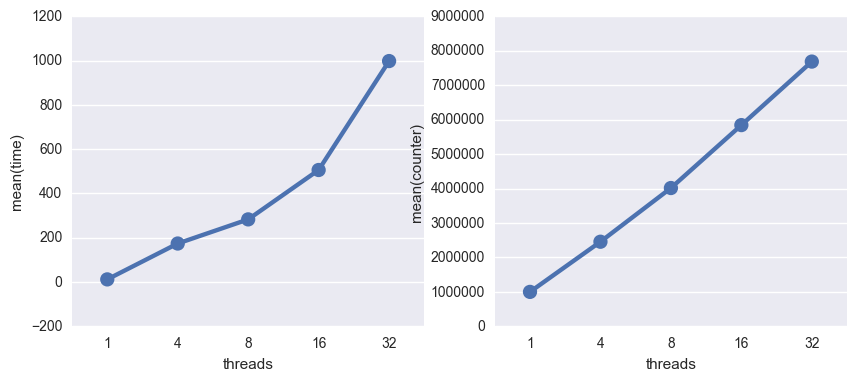

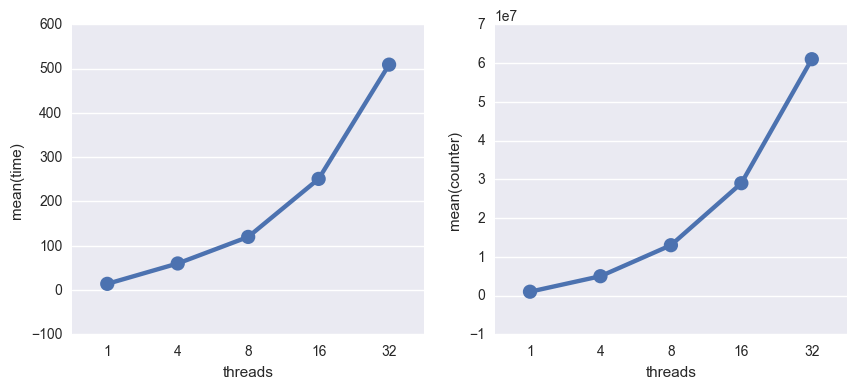

In [22]:
# df_list["Q6"]


for q in df_list.keys():
    f, a = plt.subplots(1,2)
    f.set_size_inches(10,4)
    p = sns.pointplot(x="threads", y="time", data=df_list[q],ax=a[0])
    p = sns.pointplot(x="threads", y="counter", data=df_list[q],ax=a[1] )
    plt.savefig(q+"_second.png")